In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("Hotel Reservations.csv")

In [3]:
df2 = df.sample(1000)

In [4]:
df2

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
34128,INN34129,1,0,0,1,Meal Plan 1,0,Room_Type 1,55,2018,7,7,Corporate,0,0,0,79.0,0,Not_Canceled
35649,INN35650,2,0,0,2,Meal Plan 1,0,Room_Type 1,315,2018,12,2,Offline,0,0,0,52.0,0,Not_Canceled
3440,INN03441,1,0,0,1,Not Selected,0,Room_Type 1,2,2018,6,30,Online,0,0,0,127.0,0,Not_Canceled
11760,INN11761,3,0,1,0,Meal Plan 1,0,Room_Type 4,70,2018,7,31,Online,0,0,0,146.7,0,Canceled
14434,INN14435,2,0,2,1,Meal Plan 1,0,Room_Type 1,63,2018,3,5,Online,0,0,0,80.3,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196,INN09197,2,0,2,3,Not Selected,0,Room_Type 1,28,2018,10,29,Online,0,0,0,103.4,2,Not_Canceled
20949,INN20950,2,0,0,1,Meal Plan 1,0,Room_Type 1,56,2018,6,8,Offline,0,0,0,120.0,0,Not_Canceled
18924,INN18925,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Offline,0,0,0,115.0,1,Canceled
17926,INN17927,2,0,0,1,Not Selected,0,Room_Type 1,5,2018,7,8,Online,0,0,0,139.0,2,Not_Canceled


In [5]:
pip install --user pycaret

Note: you may need to restart the kernel to use updated packages.


In [6]:
from pycaret.classification import * 

In [7]:
clf = setup(data=df2, target = "booking_status", session_id=123, normalize= True)

,Description,Value
0,session_id,123
1,Target,booking_status
2,Target Type,Binary
3,Label Encoded,"Canceled: 0, Not_Canceled: 1"
4,Original Data,"(1000, 19)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
compare_models(sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8053,0.8676,0.9365,0.8005,0.8630,0.5332,0.5548,0.1120
lightgbm,Light Gradient Boosting Machine,0.7696,0.8621,0.8513,0.8102,0.8287,0.4754,0.4819,0.1780
xgboost,Extreme Gradient Boosting,0.7781,0.8571,0.8490,0.8196,0.8333,0.5006,0.5040,0.4290
gbc,Gradient Boosting Classifier,0.7966,0.8536,0.8993,0.8117,0.8525,0.5268,0.5378,0.1560
et,Extra Trees Classifier,0.7953,0.8511,0.9058,0.8056,0.8525,0.5210,0.5334,0.1020
lr,Logistic Regression,0.8025,0.8480,0.8929,0.8226,0.8555,0.5443,0.5519,0.8440
ada,Ada Boost Classifier,0.7967,0.8474,0.8711,0.8298,0.8491,0.5376,0.5418,0.0720
lda,Linear Discriminant Analysis,0.7167,0.8272,0.9782,0.7045,0.8190,0.2397,0.3311,0.1130
knn,K Neighbors Classifier,0.7681,0.8010,0.8469,0.8084,0.8264,0.4764,0.4807,0.3220
dt,Decision Tree Classifier,0.7453,0.7072,0.8297,0.7922,0.8104,0.4229,0.4243,0.0230


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [9]:
lr = create_model("lr", fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8429,0.8868,0.9348,0.8431,0.8866,0.6330,0.6420
1,0.8714,0.9130,0.9348,0.8776,0.9053,0.7059,0.7093
2,0.7714,0.7844,0.8913,0.7885,0.8367,0.4605,0.4702
3,0.8000,0.8170,0.8261,0.8636,0.8444,0.5648,0.5659
4,0.8714,0.9248,0.9348,0.8776,0.9053,0.7059,0.7093
5,0.8286,0.8995,0.8913,0.8542,0.8723,0.6118,0.6131
6,0.7143,0.8569,0.8478,0.7500,0.7959,0.3256,0.3325
7,0.8000,0.7826,0.9348,0.7963,0.8600,0.5177,0.5386
8,0.8000,0.8720,0.9333,0.7925,0.8571,0.5311,0.5513


In [10]:
gbc = create_model("gbc", fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8286,0.8587,0.9348,0.8269,0.8776,0.5954,0.6079
1,0.8714,0.9198,1.0000,0.8364,0.9109,0.6866,0.7230
2,0.8143,0.8564,0.9130,0.8235,0.8660,0.5663,0.5743
3,0.7714,0.8505,0.8043,0.8409,0.8222,0.5027,0.5036
4,0.8000,0.8986,0.9130,0.8077,0.8571,0.5279,0.5391
5,0.8571,0.9416,0.9130,0.8750,0.8936,0.6765,0.6779
6,0.8000,0.8564,0.9348,0.7963,0.8600,0.5177,0.5386
7,0.7714,0.7908,0.8913,0.7885,0.8367,0.4605,0.4702
8,0.8000,0.8662,0.8889,0.8163,0.8511,0.5484,0.5530


In [12]:
blend_specific_soft = blend_models(estimator_list = [lr,gbc], method = "soft")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8429,0.8786,0.9348,0.8431,0.8866,0.6330,0.6420
1,0.8714,0.9293,0.9783,0.8491,0.9091,0.6933,0.7139
2,0.7857,0.8370,0.8913,0.8039,0.8454,0.4995,0.5066
3,0.8000,0.8361,0.8261,0.8636,0.8444,0.5648,0.5659
4,0.8286,0.9293,0.9348,0.8269,0.8776,0.5954,0.6079
5,0.8571,0.9330,0.9130,0.8750,0.8936,0.6765,0.6779
6,0.7143,0.8587,0.8478,0.7500,0.7959,0.3256,0.3325
7,0.7857,0.7844,0.9130,0.7925,0.8485,0.4888,0.5033
8,0.8286,0.8693,0.9333,0.8235,0.8750,0.6056,0.6178


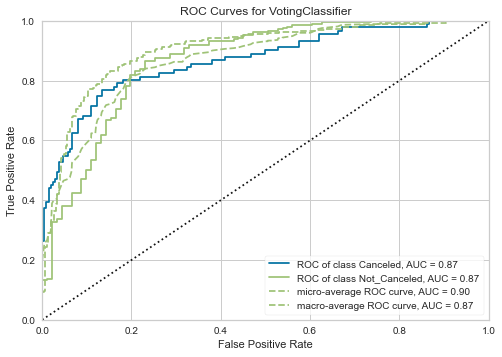

In [13]:
plot_model(blend_specific_soft)

In [ ]:
save_model(xgb, 'saved_xgb_model') 